<a href="https://colab.research.google.com/github/ayushgupta5924/AI_Lab_CS367/blob/main/week4_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Travelling Salesman Problem (TSP)

In [ ]:
tourist_locations = [
    "Jaipur",
    "Udaipur",
    "Jodhpur",
    "Jaisalmer",
    "Ajmer",
    "Pushkar",
    "Mount Abu",
    "Ranthambore National Park",
    "Bikaner",
    "Chittorgarh",
    "Sawai Madhopur",
    "Alwar",
    "Bharatpur Bird Sanctuary",
    "Kumbhalgarh Fort",
    "Mehrangarh Fort",
    "Hawa Mahal",
    "City Palace, Jaipur",
    "Amber Palace",
    "Junagarh Fort",
    "Sheesh Mahal, Udaipur",
]

calculate the distance using the haversine formula.

In [ ]:
from math import radians, sin, cos, sqrt, atan2

def distance_between_locations(location1, location2):
    # Coordinates of locations in Rajasthan (latitude, longitude)
    coordinates = {
        "Jaipur": (26.9124, 75.7873),
        "Udaipur": (24.5854, 73.7125),
        "Jodhpur": (26.2389, 73.0243),
        "Jaisalmer": (26.9157, 70.9083),
        "Ajmer": (26.4499, 74.6399),
        "Pushkar": (26.4896, 74.5511),
        "Mount Abu": (24.5928, 72.7156),
        "Ranthambore National Park": (25.9928, 76.3677),
        "Bikaner": (28.0229, 73.3119),
        "Chittorgarh": (24.8887, 74.6269),
        "Sawai Madhopur": (25.9870, 76.5527),
        "Alwar": (27.5530, 76.6346),
        "Bharatpur Bird Sanctuary": (27.1751, 77.5044),
        "Kumbhalgarh Fort": (25.1484, 73.5877),
        "Mehrangarh Fort": (26.2979, 73.0187),
        "Hawa Mahal": (26.9239, 75.8267),
        "City Palace, Jaipur": (26.9258, 75.8236),
        "Amber Palace": (26.9855, 75.8513),
        "Junagarh Fort": (28.0189, 73.3197),
        "Sheesh Mahal, Udaipur": (24.5854, 73.7125),
    }

    lat1, lon1 = (coordinates[location1][0]), (coordinates[location1][1])
    lat2, lon2 = (coordinates[location2][0]), (coordinates[location2][1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    distance = (dlon**2 + dlat**2)**0.5

    return distance

In [ ]:
def total_distance(tour):
    total = 0
    for i in range(len(tour) - 1):
        total += distance_between_locations(tour[i], tour[i + 1])
    # Add distance from last location back to the starting location to complete the tour
    total += distance_between_locations(tour[-1], tour[0])
    return total

simulated annealing

In [ ]:
import random
import math

def simulated_annealing(tourist_locations, iterations, initial_temperature, cooling_rate):
    current_solution = tourist_locations[:]
    best_solution = tourist_locations[:]
    current_temperature = initial_temperature

    for i in range(iterations):
        new_solution = current_solution[:]

        # Perform a random swap to get a new solution
        swap_index1 = random.randint(0, len(new_solution) - 1)
        swap_index2 = random.randint(0, len(new_solution) - 1)
        new_solution[swap_index1], new_solution[swap_index2] = new_solution[swap_index2], new_solution[swap_index1]

        # Calculate the cost (total distance) of the new solution
        current_cost = total_distance(current_solution)
        new_cost = total_distance(new_solution)

        # If the new solution is better or the acceptance probability is met, accept it
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / current_temperature):
            current_solution = new_solution[:]

        # Update the best solution found so far
        if total_distance(current_solution) < total_distance(best_solution):
            best_solution = current_solution[:]

        # Cool down the temperature
        current_temperature *= 1 - cooling_rate

    return best_solution

# Parameters for simulated annealing
iterations = 10000
initial_temperature = 1000.0
cooling_rate = 0.003

# Find the best tour using simulated annealing
best_tour = simulated_annealing(tourist_locations, iterations, initial_temperature, cooling_rate)
print("Best tour:", best_tour)
print("Total distance:", total_distance(best_tour))

Best tour: ['Bharatpur Bird Sanctuary', 'Alwar', 'Amber Palace', 'Hawa Mahal', 'City Palace, Jaipur', 'Jaipur', 'Chittorgarh', 'Sheesh Mahal, Udaipur', 'Udaipur', 'Mount Abu', 'Kumbhalgarh Fort', 'Jodhpur', 'Mehrangarh Fort', 'Jaisalmer', 'Bikaner', 'Junagarh Fort', 'Pushkar', 'Ajmer', 'Ranthambore National Park', 'Sawai Madhopur']
Total distance: 19.047537848735725


P1: xqf131

In [ ]:
import random
import math

# Function to parse TSPLIB file
def parse_tsplib(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        node_coords_section = False
        node_coords = []
        for line in lines:
            if line.startswith('NODE_COORD_SECTION'):
                node_coords_section = True
                continue
            if line.startswith('EOF'):
                break
            if node_coords_section:
                node_data = line.strip().split()
                node_coords.append((float(node_data[1]), float(node_data[2])))
        return node_coords

# Function to calculate Euclidean distance between two nodes
def distance(node1, node2):
    return math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2)

# Function to calculate total distance of a tour
def total_distance(tour, nodes):
    total = 0
    for i in range(len(tour) - 1):
        total += distance(nodes[tour[i]], nodes[tour[i + 1]])
    # Add distance from last node back to the starting node to complete the tour
    total += distance(nodes[tour[-1]], nodes[tour[0]])
    return total

# Simulated annealing function
def simulated_annealing(nodes, iterations, initial_temperature, cooling_rate):
    n = len(nodes)
    current_tour = list(range(n))
    random.shuffle(current_tour)  # Shuffle the initial tour
    best_tour = current_tour[:]
    current_temperature = initial_temperature

    for i in range(iterations):
        # Calculate the cost (total distance) of the current tour
        current_cost = total_distance(current_tour, nodes)

        # Generate a neighboring solution by reversing a random segment of the current tour
        new_tour = current_tour[:]
        start_index = random.randint(0, n - 1)
        end_index = random.randint(start_index + 1, n)
        new_tour[start_index:end_index] = reversed(new_tour[start_index:end_index])
        new_cost = total_distance(new_tour, nodes)

        # If the new solution is better or the acceptance probability is met, accept it
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / current_temperature):
            current_tour = new_tour[:]

        # Update the best solution found so far
        if total_distance(current_tour, nodes) < total_distance(best_tour, nodes):
            best_tour = current_tour[:]

        # Cool down the temperature
        current_temperature *= 1 - cooling_rate

    return best_tour

# Load data from TSPLIB file
filename = "xqf131.tsp"
nodes = parse_tsplib(filename)

# Parameters for simulated annealing
iterations = 100000
initial_temperature = 1000.0
cooling_rate = 0.0003

# Find the best tour using simulated annealing
best_tour = simulated_annealing(nodes, iterations, initial_temperature, cooling_rate)
print("Best tour:", best_tour)
print("Total distance (km) :", total_distance(best_tour, nodes))


Best tour: [117, 113, 123, 112, 124, 125, 130, 126, 127, 128, 121, 119, 116, 110, 102, 103, 96, 95, 90, 89, 94, 109, 115, 118, 114, 108, 107, 106, 98, 93, 91, 87, 82, 83, 84, 85, 79, 71, 72, 60, 59, 58, 38, 39, 40, 41, 42, 43, 23, 10, 3, 9, 8, 22, 37, 36, 21, 35, 34, 33, 51, 57, 62, 56, 55, 50, 49, 48, 47, 32, 20, 31, 30, 29, 28, 27, 19, 6, 7, 2, 1, 0, 5, 11, 4, 12, 17, 13, 14, 15, 16, 24, 18, 26, 25, 52, 44, 45, 46, 54, 53, 74, 67, 63, 73, 88, 76, 77, 80, 81, 68, 64, 61, 65, 69, 66, 70, 75, 78, 86, 92, 97, 100, 101, 105, 104, 99, 111, 122, 129, 120]
Total distance (km) : 655.9357386940826


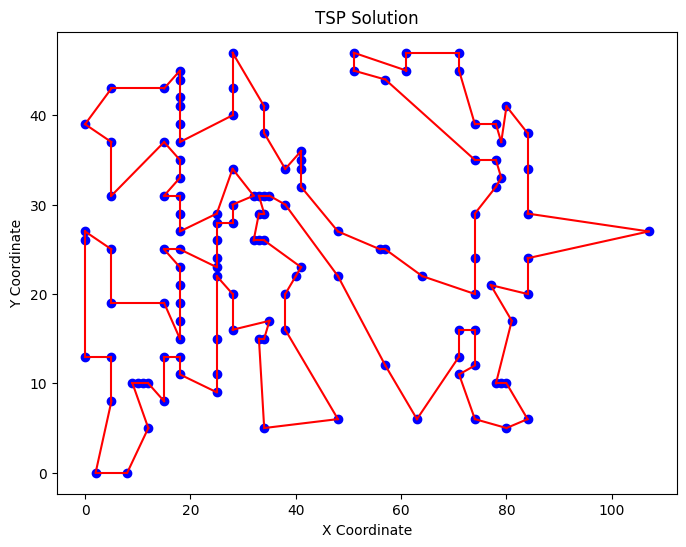

In [ ]:
import matplotlib.pyplot as plt

# Function to plot the data points and edges
def plot_tour(nodes, tour):
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue')
    plt.title('TSP Solution')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

    # Plot edges representing the tour
    for i in range(len(tour) - 1):
        plt.plot([nodes[tour[i]][0], nodes[tour[i + 1]][0]], [nodes[tour[i]][1], nodes[tour[i + 1]][1]], color='red')
    plt.plot([nodes[tour[-1]][0], nodes[tour[0]][0]], [nodes[tour[-1]][1], nodes[tour[0]][1]], color='red')  # Connect last node to first node

    plt.show()

# Plot the tour
plot_tour(nodes, best_tour)

P2: XGQ237

In [ ]:
import random
import math

# Function to parse TSPLIB file
def parse_tsplib(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        node_coords_section = False
        node_coords = []
        for line in lines:
            if line.startswith('NODE_COORD_SECTION'):
                node_coords_section = True
                continue
            if line.startswith('EOF'):
                break
            if node_coords_section:
                node_data = line.strip().split()
                node_coords.append((float(node_data[1]), float(node_data[2])))
        return node_coords

# Function to calculate Euclidean distance between two nodes
def distance(node1, node2):
    return math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2)

# Function to calculate total distance of a tour
def total_distance(tour, nodes):
    total = 0
    for i in range(len(tour) - 1):
        total += distance(nodes[tour[i]], nodes[tour[i + 1]])
    # Add distance from last node back to the starting node to complete the tour
    total += distance(nodes[tour[-1]], nodes[tour[0]])
    return total

# Simulated annealing function
def simulated_annealing(nodes, iterations, initial_temperature, cooling_rate):
    n = len(nodes)
    current_tour = list(range(n))
    random.shuffle(current_tour)  # Shuffle the initial tour
    best_tour = current_tour[:]
    current_temperature = initial_temperature

    for i in range(iterations):
        # Calculate the cost (total distance) of the current tour
        current_cost = total_distance(current_tour, nodes)

        # Generate a neighboring solution by reversing a random segment of the current tour
        new_tour = current_tour[:]
        start_index = random.randint(0, n - 1)
        end_index = random.randint(start_index + 1, n)
        new_tour[start_index:end_index] = reversed(new_tour[start_index:end_index])
        new_cost = total_distance(new_tour, nodes)

        # If the new solution is better or the acceptance probability is met, accept it
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / current_temperature):
            current_tour = new_tour[:]

        # Update the best solution found so far
        if total_distance(current_tour, nodes) < total_distance(best_tour, nodes):
            best_tour = current_tour[:]

        # Cool down the temperature
        current_temperature *= 1 - cooling_rate

    return best_tour

# Load data from TSPLIB file
filename = "xqg237.tsp"
nodes = parse_tsplib(filename)

# Parameters for simulated annealing
iterations = 100000
initial_temperature = 1000.0
cooling_rate = 0.0003

# Find the best tour using simulated annealing
best_tour = simulated_annealing(nodes, iterations, initial_temperature, cooling_rate)
print("Best tour:", best_tour)
print("Total distance (km) :", total_distance(best_tour, nodes))


Best tour: [61, 51, 52, 44, 53, 63, 62, 68, 82, 74, 75, 83, 99, 98, 84, 85, 76, 71, 69, 70, 65, 72, 77, 101, 111, 112, 113, 124, 125, 126, 133, 132, 123, 131, 130, 141, 142, 143, 179, 178, 177, 170, 186, 187, 198, 200, 201, 212, 211, 210, 223, 234, 235, 236, 233, 222, 220, 232, 231, 229, 230, 218, 216, 219, 217, 199, 209, 215, 208, 207, 206, 214, 228, 227, 226, 225, 205, 204, 203, 224, 221, 202, 213, 197, 189, 190, 182, 188, 181, 180, 171, 164, 172, 173, 165, 166, 151, 137, 118, 119, 107, 108, 109, 110, 122, 121, 120, 138, 153, 154, 155, 139, 159, 160, 161, 162, 163, 140, 158, 157, 156, 167, 168, 169, 185, 196, 195, 194, 193, 192, 191, 183, 184, 174, 175, 176, 152, 150, 149, 136, 148, 147, 146, 145, 144, 135, 134, 129, 128, 127, 117, 114, 116, 115, 100, 87, 88, 95, 92, 96, 103, 102, 104, 105, 106, 97, 91, 94, 90, 93, 89, 81, 80, 79, 78, 86, 73, 59, 57, 64, 54, 46, 36, 35, 31, 32, 33, 29, 26, 18, 25, 30, 28, 23, 22, 17, 15, 14, 13, 7, 0, 8, 4, 5, 1, 9, 10, 11, 6, 2, 3, 12, 24, 27, 45, 2

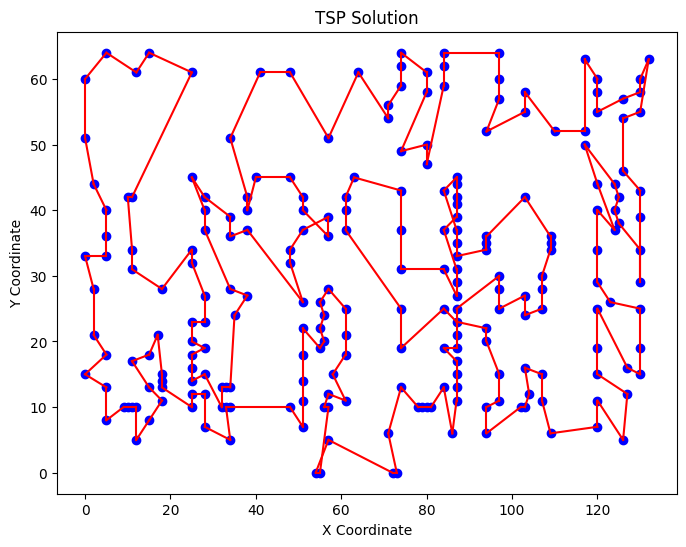

In [ ]:
import matplotlib.pyplot as plt

# Function to plot the data points and edges
def plot_tour(nodes, tour):
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue')
    plt.title('TSP Solution')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

    # Plot edges representing the tour
    for i in range(len(tour) - 1):
        plt.plot([nodes[tour[i]][0], nodes[tour[i + 1]][0]], [nodes[tour[i]][1], nodes[tour[i + 1]][1]], color='red')
    plt.plot([nodes[tour[-1]][0], nodes[tour[0]][0]], [nodes[tour[-1]][1], nodes[tour[0]][1]], color='red')  # Connect last node to first node

    plt.show()

# Plot the tour
plot_tour(nodes, best_tour)

pma343.tsp

In [ ]:
import random
import math

# Function to parse TSPLIB file
def parse_tsplib(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        node_coords_section = False
        node_coords = []
        for line in lines:
            if line.startswith('NODE_COORD_SECTION'):
                node_coords_section = True
                continue
            if line.startswith('EOF'):
                break
            if node_coords_section:
                node_data = line.strip().split()
                node_coords.append((float(node_data[1]), float(node_data[2])))
        return node_coords

# Function to calculate Euclidean distance between two nodes
def distance(node1, node2):
    return math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2)

# Function to calculate total distance of a tour
def total_distance(tour, nodes):
    total = 0
    for i in range(len(tour) - 1):
        total += distance(nodes[tour[i]], nodes[tour[i + 1]])
    # Add distance from last node back to the starting node to complete the tour
    total += distance(nodes[tour[-1]], nodes[tour[0]])
    return total

# Simulated annealing function
def simulated_annealing(nodes, iterations, initial_temperature, cooling_rate):
    n = len(nodes)
    current_tour = list(range(n))
    random.shuffle(current_tour)  # Shuffle the initial tour
    best_tour = current_tour[:]
    current_temperature = initial_temperature

    for i in range(iterations):
        # Calculate the cost (total distance) of the current tour
        current_cost = total_distance(current_tour, nodes)

        # Generate a neighboring solution by reversing a random segment of the current tour
        new_tour = current_tour[:]
        start_index = random.randint(0, n - 1)
        end_index = random.randint(start_index + 1, n)
        new_tour[start_index:end_index] = reversed(new_tour[start_index:end_index])
        new_cost = total_distance(new_tour, nodes)

        # If the new solution is better or the acceptance probability is met, accept it
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / current_temperature):
            current_tour = new_tour[:]

        # Update the best solution found so far
        if total_distance(current_tour, nodes) < total_distance(best_tour, nodes):
            best_tour = current_tour[:]

        # Cool down the temperature
        current_temperature *= 1 - cooling_rate

    return best_tour

# Load data from TSPLIB file
filename = "pma343.tsp"
nodes = parse_tsplib(filename)

# Parameters for simulated annealing
iterations = 100000
initial_temperature = 1000.0
cooling_rate = 0.0003

# Find the best tour using simulated annealing
best_tour = simulated_annealing(nodes, iterations, initial_temperature, cooling_rate)
print("Best tour:", best_tour)
print("Total distance (km) :", total_distance(best_tour, nodes))

Best tour: [68, 69, 67, 75, 78, 77, 74, 76, 79, 82, 95, 98, 97, 105, 109, 110, 107, 106, 99, 101, 117, 115, 114, 113, 112, 111, 136, 140, 139, 138, 137, 146, 155, 161, 167, 183, 190, 195, 194, 193, 192, 191, 202, 205, 211, 214, 203, 206, 209, 212, 219, 221, 218, 216, 215, 217, 224, 223, 226, 227, 246, 252, 247, 240, 239, 238, 237, 245, 244, 234, 235, 236, 233, 232, 231, 230, 222, 229, 250, 251, 253, 255, 257, 258, 259, 260, 268, 261, 269, 264, 263, 262, 271, 270, 275, 276, 278, 277, 296, 301, 306, 300, 295, 294, 293, 287, 286, 285, 284, 283, 282, 298, 292, 299, 304, 305, 313, 310, 309, 308, 303, 312, 319, 320, 328, 336, 329, 330, 332, 337, 333, 331, 334, 338, 339, 341, 342, 340, 335, 327, 326, 325, 322, 321, 315, 314, 317, 316, 323, 324, 318, 311, 307, 302, 297, 288, 289, 290, 291, 280, 281, 279, 274, 273, 272, 266, 265, 267, 256, 254, 243, 249, 248, 242, 241, 228, 225, 220, 213, 210, 207, 196, 197, 198, 199, 204, 208, 200, 201, 186, 184, 180, 187, 188, 189, 181, 182, 174, 173, 172, 17

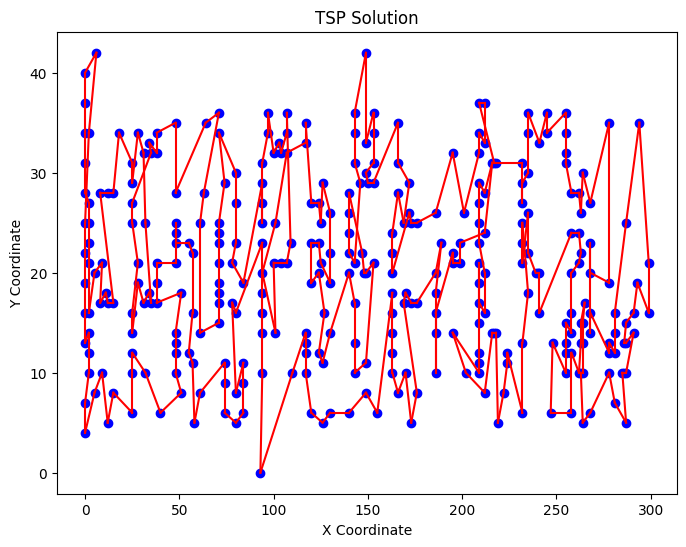

In [ ]:
    import matplotlib.pyplot as plt

    # Function to plot the data points and edges
    def plot_tour(nodes, tour):
        x = [node[0] for node in nodes]
        y = [node[1] for node in nodes]

        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, color='blue')
        plt.title('TSP Solution')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')

        # Plot edges representing the tour
        for i in range(len(tour) - 1):
            plt.plot([nodes[tour[i]][0], nodes[tour[i + 1]][0]], [nodes[tour[i]][1], nodes[tour[i + 1]][1]], color='red')
        plt.plot([nodes[tour[-1]][0], nodes[tour[0]][0]], [nodes[tour[-1]][1], nodes[tour[0]][1]], color='red')  # Connect last node to first node

        plt.show()

    # Plot the tour
    plot_tour(nodes, best_tour)

pka379.tsp

In [ ]:
import random
import math

# Function to parse TSPLIB file
def parse_tsplib(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        node_coords_section = False
        node_coords = []
        for line in lines:
            if line.startswith('NODE_COORD_SECTION'):
                node_coords_section = True
                continue
            if line.startswith('EOF'):
                break
            if node_coords_section:
                node_data = line.strip().split()
                node_coords.append((float(node_data[1]), float(node_data[2])))
        return node_coords

# Function to calculate Euclidean distance between two nodes
def distance(node1, node2):
    return math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2)

# Function to calculate total distance of a tour
def total_distance(tour, nodes):
    total = 0
    for i in range(len(tour) - 1):
        total += distance(nodes[tour[i]], nodes[tour[i + 1]])
    # Add distance from last node back to the starting node to complete the tour
    total += distance(nodes[tour[-1]], nodes[tour[0]])
    return total

# Simulated annealing function
def simulated_annealing(nodes, iterations, initial_temperature, cooling_rate):
    n = len(nodes)
    current_tour = list(range(n))
    random.shuffle(current_tour)  # Shuffle the initial tour
    best_tour = current_tour[:]
    current_temperature = initial_temperature

    for i in range(iterations):
        # Calculate the cost (total distance) of the current tour
        current_cost = total_distance(current_tour, nodes)

        # Generate a neighboring solution by reversing a random segment of the current tour
        new_tour = current_tour[:]
        start_index = random.randint(0, n - 1)
        end_index = random.randint(start_index + 1, n)
        new_tour[start_index:end_index] = reversed(new_tour[start_index:end_index])
        new_cost = total_distance(new_tour, nodes)

        # If the new solution is better or the acceptance probability is met, accept it
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / current_temperature):
            current_tour = new_tour[:]

        # Update the best solution found so far
        if total_distance(current_tour, nodes) < total_distance(best_tour, nodes):
            best_tour = current_tour[:]

        # Cool down the temperature
        current_temperature *= 1 - cooling_rate

    return best_tour

# Load data from TSPLIB file
filename = "pka379.tsp"
nodes = parse_tsplib(filename)

# Parameters for simulated annealing
iterations = 100000
initial_temperature = 1000.0
cooling_rate = 0.0003

# Find the best tour using simulated annealing
best_tour = simulated_annealing(nodes, iterations, initial_temperature, cooling_rate)
print("Best tour:", best_tour)
print("Total distance (km) :", total_distance(best_tour, nodes))

Best tour: [59, 65, 72, 83, 92, 91, 88, 86, 82, 81, 80, 79, 78, 77, 76, 75, 74, 85, 87, 90, 95, 96, 97, 98, 99, 100, 101, 117, 116, 111, 115, 121, 122, 124, 106, 102, 103, 93, 94, 107, 119, 125, 135, 134, 133, 148, 147, 157, 156, 155, 146, 141, 143, 138, 132, 131, 130, 129, 128, 139, 144, 137, 140, 142, 145, 149, 153, 154, 164, 165, 180, 194, 200, 201, 196, 195, 210, 209, 204, 203, 206, 205, 215, 225, 217, 216, 218, 219, 232, 231, 234, 247, 266, 250, 251, 252, 258, 257, 274, 268, 269, 270, 276, 277, 271, 275, 282, 288, 283, 289, 311, 299, 294, 300, 296, 297, 298, 313, 315, 335, 336, 354, 353, 357, 358, 347, 344, 333, 332, 331, 338, 330, 329, 327, 328, 318, 320, 319, 317, 321, 316, 337, 341, 339, 342, 345, 349, 355, 348, 359, 363, 362, 366, 375, 371, 364, 360, 361, 367, 372, 377, 373, 378, 376, 374, 369, 370, 365, 368, 356, 351, 352, 350, 346, 343, 340, 334, 322, 323, 324, 325, 326, 314, 307, 304, 302, 305, 308, 312, 310, 309, 306, 303, 301, 295, 293, 291, 292, 290, 284, 285, 286, 287, 

In [ ]:
import matplotlib.pyplot as plt

# Function to plot the data points and edges
def plot_tour(nodes, tour):
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue')
    plt.title('TSP Solution')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

    # Plot edges representing the tour
    for i in range(len(tour) - 1):
        plt.plot([nodes[tour[i]][0], nodes[tour[i + 1]][0]], [nodes[tour[i]][1], nodes[tour[i + 1]][1]], color='red')
    plt.plot([nodes[tour[-1]][0], nodes[tour[0]][0]], [nodes[tour[-1]][1], nodes[tour[0]][1]], color='red')  # Connect last node to first node

    plt.show()

# Plot the tour
plot_tour(nodes, best_tour)

bcl380.tsp

In [ ]:
import random
import math

# Function to parse TSPLIB file
def parse_tsplib(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        node_coords_section = False
        node_coords = []
        for line in lines:
            if line.startswith('NODE_COORD_SECTION'):
                node_coords_section = True
                continue
            if line.startswith('EOF'):
                break
            if node_coords_section:
                node_data = line.strip().split()
                node_coords.append((float(node_data[1]), float(node_data[2])))
        return node_coords

# Function to calculate Euclidean distance between two nodes
def distance(node1, node2):
    return math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2)

# Function to calculate total distance of a tour
def total_distance(tour, nodes):
    total = 0
    for i in range(len(tour) - 1):
        total += distance(nodes[tour[i]], nodes[tour[i + 1]])
    # Add distance from last node back to the starting node to complete the tour
    total += distance(nodes[tour[-1]], nodes[tour[0]])
    return total

# Simulated annealing function
def simulated_annealing(nodes, iterations, initial_temperature, cooling_rate):
    n = len(nodes)
    current_tour = list(range(n))
    random.shuffle(current_tour)  # Shuffle the initial tour
    best_tour = current_tour[:]
    current_temperature = initial_temperature

    for i in range(iterations):
        # Calculate the cost (total distance) of the current tour
        current_cost = total_distance(current_tour, nodes)

        # Generate a neighboring solution by reversing a random segment of the current tour
        new_tour = current_tour[:]
        start_index = random.randint(0, n - 1)
        end_index = random.randint(start_index + 1, n)
        new_tour[start_index:end_index] = reversed(new_tour[start_index:end_index])
        new_cost = total_distance(new_tour, nodes)

        # If the new solution is better or the acceptance probability is met, accept it
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / current_temperature):
            current_tour = new_tour[:]

        # Update the best solution found so far
        if total_distance(current_tour, nodes) < total_distance(best_tour, nodes):
            best_tour = current_tour[:]

        # Cool down the temperature
        current_temperature *= 1 - cooling_rate

    return best_tour

# Load data from TSPLIB file
filename = "bcl380.tsp"
nodes = parse_tsplib(filename)

# Parameters for simulated annealing
iterations = 100000
initial_temperature = 1000.0
cooling_rate = 0.0003

# Find the best tour using simulated annealing
best_tour = simulated_annealing(nodes, iterations, initial_temperature, cooling_rate)
print("Best tour:", best_tour)
print("Total distance (km) :", total_distance(best_tour, nodes))

Best tour: [332, 333, 346, 355, 334, 367, 336, 318, 253, 268, 252, 251, 232, 200, 199, 239, 242, 198, 197, 196, 195, 235, 185, 186, 191, 182, 181, 172, 171, 170, 156, 155, 130, 93, 27, 9, 29, 10, 51, 49, 65, 66, 48, 38, 28, 94, 119, 131, 90, 89, 123, 124, 125, 91, 67, 59, 34, 33, 32, 31, 30, 127, 128, 129, 95, 187, 188, 173, 174, 189, 175, 152, 151, 99, 98, 97, 96, 72, 73, 74, 75, 76, 57, 55, 58, 61, 62, 63, 78, 79, 85, 70, 64, 18, 47, 46, 45, 17, 16, 44, 56, 43, 54, 42, 41, 52, 60, 39, 12, 13, 11, 0, 40, 68, 84, 101, 102, 133, 132, 157, 160, 158, 135, 134, 77, 136, 144, 137, 138, 146, 150, 148, 139, 140, 147, 149, 165, 164, 206, 205, 204, 203, 202, 201, 161, 162, 163, 207, 208, 166, 193, 238, 240, 243, 254, 276, 282, 281, 317, 316, 315, 314, 267, 250, 280, 279, 313, 312, 311, 310, 309, 330, 353, 352, 372, 366, 302, 303, 304, 305, 306, 277, 278, 248, 266, 249, 275, 231, 230, 229, 192, 184, 183, 126, 122, 121, 120, 118, 82, 115, 116, 141, 143, 117, 142, 113, 112, 81, 88, 37, 26, 8, 24, 

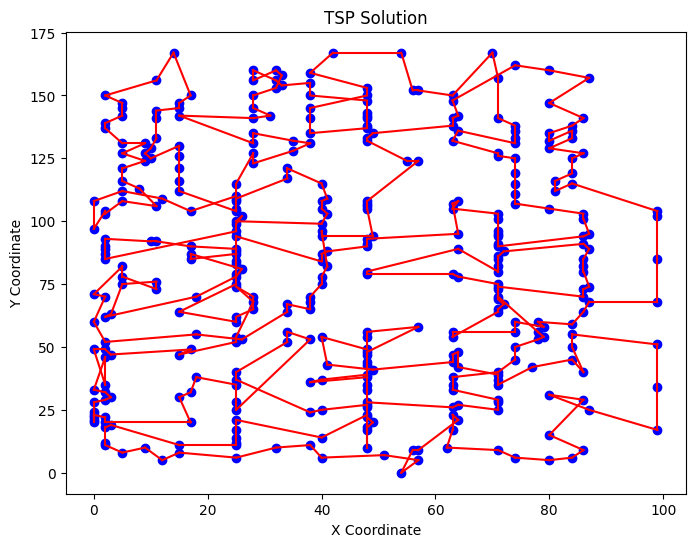

In [ ]:
import matplotlib.pyplot as plt

# Function to plot the data points and edges
def plot_tour(nodes, tour):
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue')
    plt.title('TSP Solution')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

    # Plot edges representing the tour
    for i in range(len(tour) - 1):
        plt.plot([nodes[tour[i]][0], nodes[tour[i + 1]][0]], [nodes[tour[i]][1], nodes[tour[i + 1]][1]], color='red')
    plt.plot([nodes[tour[-1]][0], nodes[tour[0]][0]], [nodes[tour[-1]][1], nodes[tour[0]][1]], color='red')  # Connect last node to first node

    plt.show()

# Plot the tour
plot_tour(nodes, best_tour)